# KNN

## IMPORTAÇÕES DE BIBLIOTECAS

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## IMPORTAÇÃO DO DATASET
todo dataset está com os dados criptografados

In [42]:
dados = pd.read_csv('C:/Users/PICHAU/Desktop/Análises de dados/Machine Learning/KNN/dados/Classified Data', index_col=0)
dados.sample(5)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
948,0.467059,1.234031,1.177821,0.464771,1.051342,1.013430,0.669465,1.209963,1.145848,1.407046,0
823,1.214172,1.312240,0.925951,0.448518,0.994856,0.947420,0.916138,1.541739,0.990535,1.493585,0
218,0.368129,1.388373,1.443594,0.872385,1.188443,1.357372,1.081402,0.933731,1.095249,1.231360,0
449,0.439739,1.228324,1.051156,0.800620,1.076679,0.613167,1.132654,1.319128,0.884985,1.550835,0
440,0.742357,1.118389,0.920343,0.621576,1.465672,1.018446,0.456728,1.064865,0.861557,1.484092,0


In [43]:
print(f'O dataset tem {dados.shape[0]} Linhas e {dados.shape[1]} Colunas')

O dataset tem 1000 Linhas e 11 Colunas


In [44]:
#Visualizar informações em geral
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [45]:
dados.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [46]:
#Visualizar se há dados faltantes
dados.isna().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [47]:
#pré-processamento - (para o KNN precisamos normalizar os dados)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #Criando estancia
scaler.fit(dados.drop('TARGET CLASS', axis = 1)) #Treinando os dados
dados_normalizados = scaler.fit_transform(dados.drop('TARGET CLASS', axis = 1)) #Normalizando os dados

In [48]:
dados_normalizados

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [49]:
df_parametros = pd.DataFrame(dados_normalizados, columns = dados.columns[:-1])
df_parametros.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## CORRELAÇÃO

<AxesSubplot:>

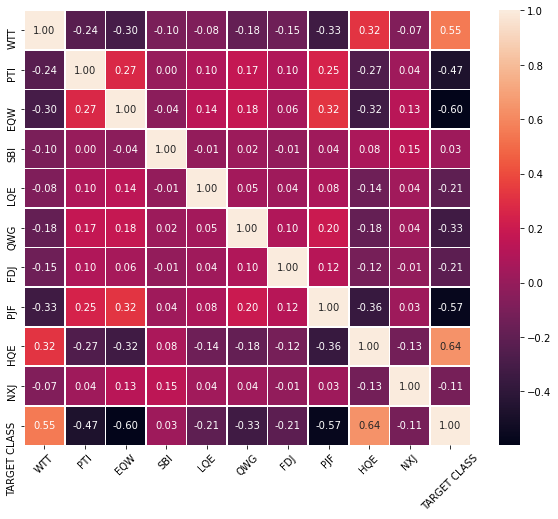

In [50]:
plt.figure(figsize=(10,8))
corr = dados.corr()
ax = sns.heatmap(corr, annot=True, fmt="0.2f", lw=0.6)
plt.xticks(rotation=45)
ax

## Treino e Teste os dados

In [51]:
from sklearn.model_selection import train_test_split #Importação da biblioteca para dividir os dados em treino e teste

In [52]:
X = df_parametros
y = dados['TARGET CLASS']

In [53]:
#divisão dos dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [54]:
#Importação do modelo KNN
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn_modelo = KNeighborsClassifier(n_neighbors = 2) #Estanciando o modelo, n_neighbors é o número de clusters
knn_modelo.fit(x_train, y_train) #Treinando o modelo 
y_pred = knn_modelo.predict(x_test) #Prevendo dados

In [56]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test, y_pred)) #Matriz de confusão

[[142   9]
 [ 16 133]]


In [57]:
print(classification_report(y_test, y_pred)) #relatório de classificação

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       151
           1       0.94      0.89      0.91       149

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [58]:
modelo_precisao = knn_modelo.score(x_test, y_test)
print(f'Precisão do modelo :{round(modelo_precisao*100, 2)}%')

Precisão do modelo :91.67%


Vamos utilizar o método conhecido como método cotovelo para saber a  quantidade ideal de clusters.

In [59]:
error_rate = []

for i in range(1, 40):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(x_train, y_train)
    knn_y_pred = knn_model.predict(x_test)
    error_rate.append(np.mean(knn_y_pred != y_test))

Text(0, 0.5, 'Taxa de error')

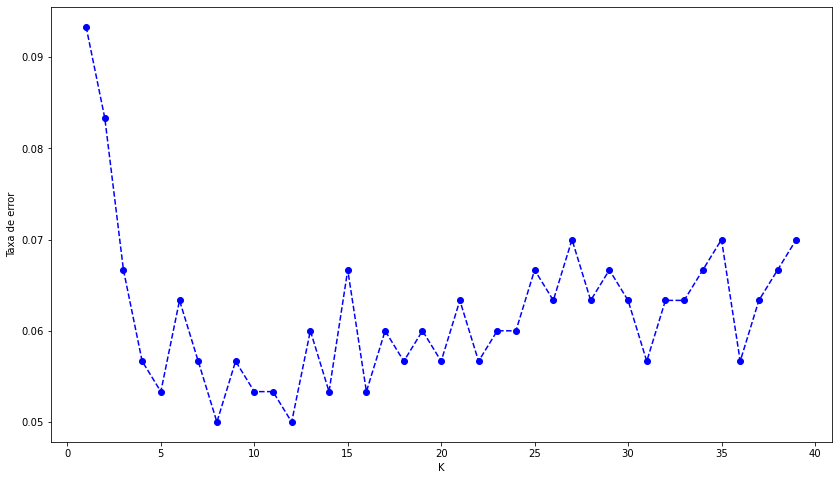

In [60]:
#Visualização da variação dos clusters
plt.figure(figsize=(14,8))
plt.plot(range(1,40), error_rate, color='blue', ls='--', marker='o')
plt.xlabel('K')
plt.ylabel('Taxa de error')

Aparti do K = 20 parece ser um bom valor, porque não há muita variância

In [64]:
#Repetindo o modelo com clusters com o valor de 20
knn_modelo2 = KNeighborsClassifier(n_neighbors = 20) #Estanciando o modelo, n_neighbors é o número de clusters
knn_modelo2.fit(x_train, y_train) #Treinando o modelo 
y_pred2 = knn_modelo2.predict(x_test) #Prevendo dados

In [65]:
print(classification_report(y_test, y_pred)) #relatório de classificação

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       151
           1       0.94      0.89      0.91       149

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [67]:
modelo_precisao = knn_modelo2.score(x_test, y_test)
print(f'Precisão do modelo2:{round(modelo_precisao*100, 2)}%, com K=20')

Precisão do modelo2:94.33%, com K=20
